In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [6]:
Cov_Mod_df = pd.read_csv("/BioII/lulab_b/huangkeyun/zhangys/alkb-seq/resources/Cov_Mod.txt",sep = '\t')
Cov_Mod_df['last_part'] = Cov_Mod_df['sample'].str.split('|').str[-1]
Cov_Mod_df['label'] = Cov_Mod_df['last_part'].map({'same': 0, 'diff': 1})
Cov_Mod_df

,sample,cov_1,cov_2,cov_3,cov_4,cov_5,cov_6,cov_7,cov_8,cov_9,...,RNA-editing.V33,RNA-editing.V34,RNA-editing.V35,RNA-editing.V36,RNA-editing.V37,RNA-editing.V38,RNA-editing.V39,RNA-editing.V40,last_part,label
0,NR_145819_____1|10776|same,1.000000,0.968750,0.953125,0.984375,0.984375,0.984375,0.718750,0.703125,0.671875,...,0,0,0,0,0,0,0,0,same,0
1,NR_146144_____1|10748|same,1.000000,0.975610,0.951220,0.804878,0.780488,0.780488,0.731707,0.682927,0.463415,...,0,0,0,0,0,0,0,0,same,0
2,NR_146152_____1|103|same,0.758621,0.758621,0.724138,0.310345,0.310345,0.275862,0.275862,0.275862,0.275862,...,0,0,0,0,0,0,0,0,same,0
3,NR_146154_____1|1910|same,0.117647,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0,0,0,0,0,0,0,0,same,0
4,NR_145819_____1|7151|diff,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,diff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,ENST00000622628_____1|400|same,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,same,0
764,ENST00000636175_____1|1662|same,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,same,0
765,NR_146117_____1|811|same,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,...,0,0,0,0,0,0,0,0,same,0
766,31895|25|same,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,0.111111,...,0,0,0,0,0,0,0,0,same,0


In [7]:
Cov_Mod_df['label'].value_counts()

label
0    627
1    141
Name: count, dtype: int64

In [9]:
labels_df = Cov_Mod_df[["sample", "label"]]
labels_df.to_csv('/BioII/lulab_b/huangkeyun/zhangys/alkb-seq/resources/labels.csv',index = None)

In [ ]:
diff_df = Cov_Mod_df[(Cov_Mod_df['label']==1)]
Same_df = Cov_Mod_df[(Cov_Mod_df['label']==0)]


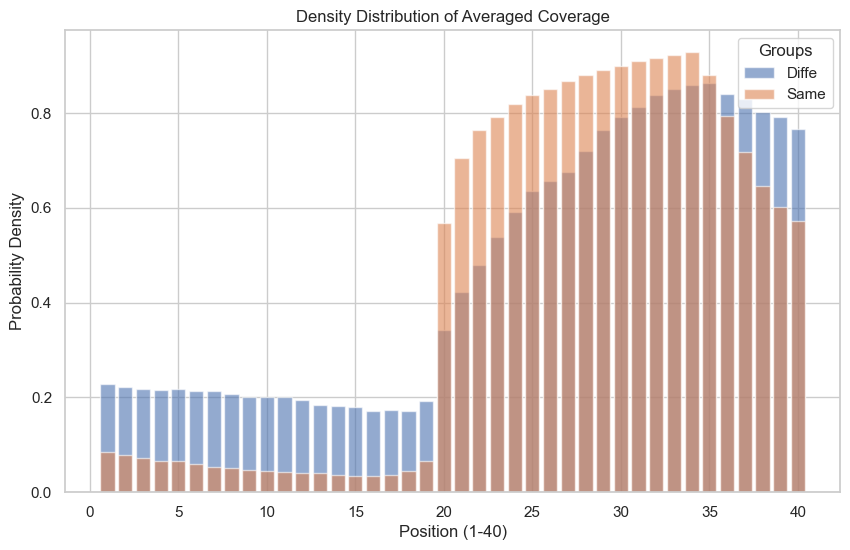

In [73]:
data_diff = diff_df.iloc[:, 1:41]
data_same = Same_df.iloc[:, 1:41]
# 计算总共有多少组，每组40列
num_samples, num_columns = data_diff.shape
num_groups = num_columns // 40  # 每组40列

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


group_data_diff = data_diff    
mean_values_diff = group_data_diff.mean(axis=0)
mean_values_same = data_same.mean(axis=0)
    
plt.bar(range(1, len(mean_values_diff) + 1), mean_values_diff, width=0.8, label=f"Diffe", alpha=0.6)
plt.bar(range(1, len(mean_values_diff) + 1), mean_values_same, width=0.8, label=f"Same", alpha=0.6)

plt.title("Density Distribution of Averaged Coverage")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

# 显示图像
plt.show()

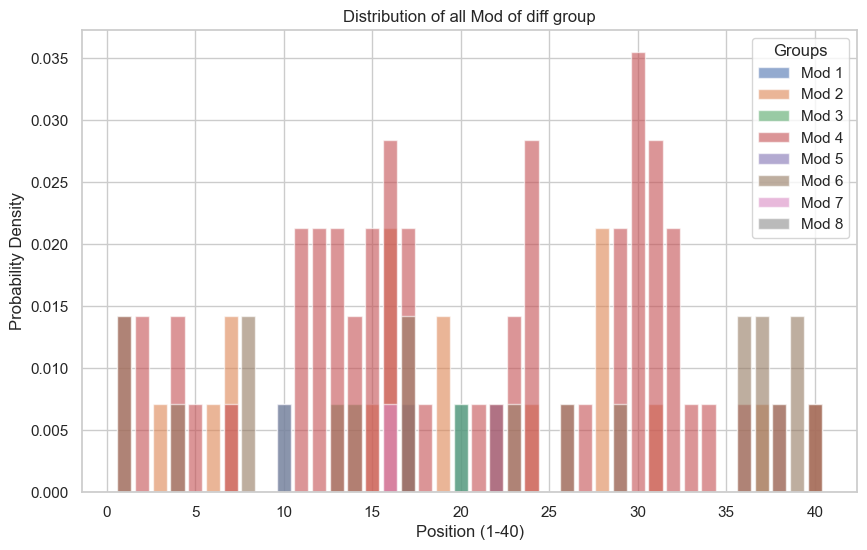

In [72]:
data = diff_df.iloc[:, 41:-1]

# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))

# 对每组位点信息进行处理
for i in range(num_groups):
    # 提取当前组的数据
    group_data = data.iloc[:, i * 40:(i + 1) * 40]
    
    # 计算每个位置（列）的平均值
    mean_values = group_data.mean(axis=0)
    
    # 绘制当前组的密度分布曲线
    plt.bar(range(1, len(mean_values) + 1), mean_values, width=0.8, label=f"Mod {i+1}", alpha=0.6)

# 设置图像标题、标签和显示图例
plt.title("Distribution of all Mod of diff group")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")


# 显示图像
plt.show()

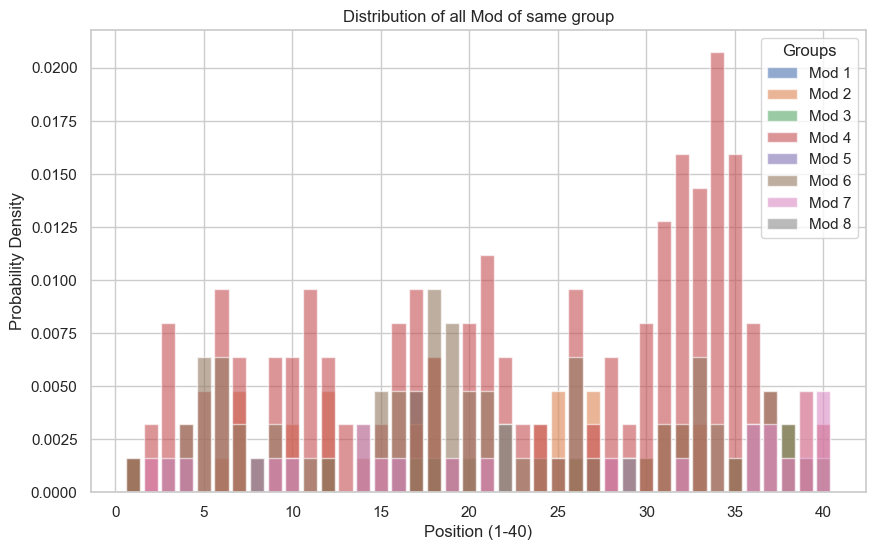

In [65]:
data = Same_df.iloc[:, 41:-1]

# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))

# 对每组位点信息进行处理
for i in range(num_groups):
    # 提取当前组的数据
    group_data = data.iloc[:, i * 40:(i + 1) * 40]
    
    # 计算每个位置（列）的平均值
    mean_values = group_data.mean(axis=0)
    
    # 绘制当前组的密度分布曲线
    plt.bar(range(1, len(mean_values) + 1), mean_values, width=0.8, label=f"Mod {i+1}", alpha=0.6)

# 设置图像标题、标签和显示图例
plt.title("Distribution of all Mod of same group")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")


# 显示图像
plt.show()

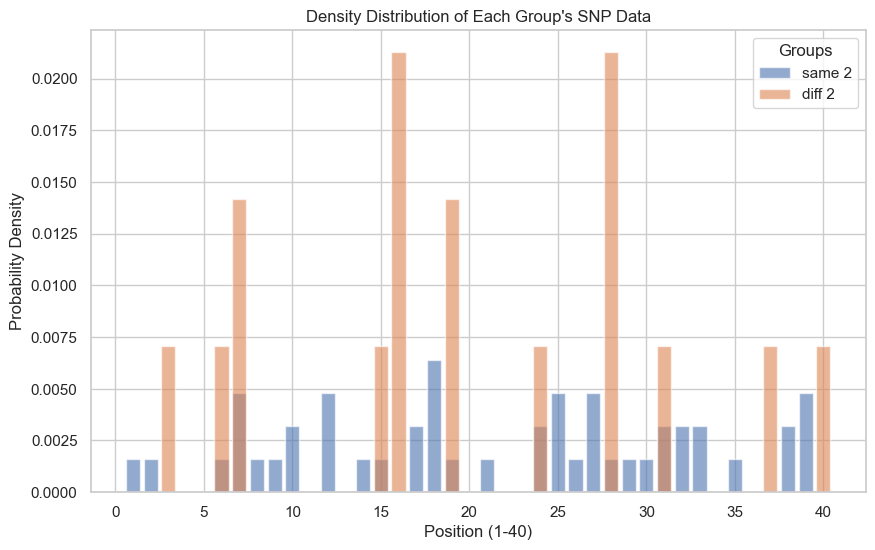

In [60]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 1
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

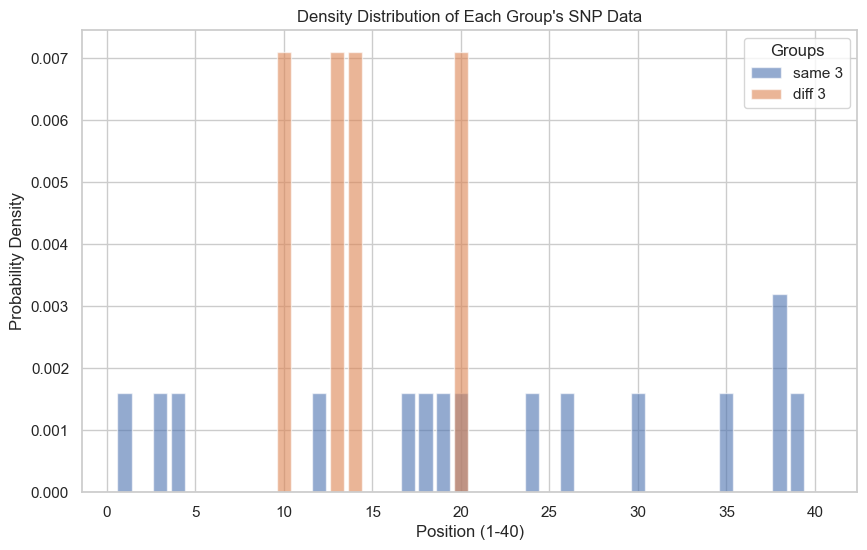

In [66]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 2
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

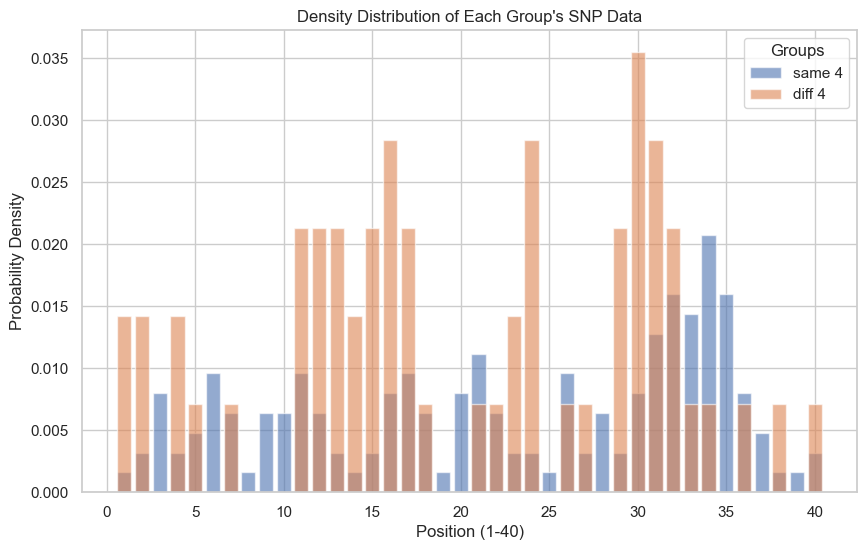

In [67]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 3
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

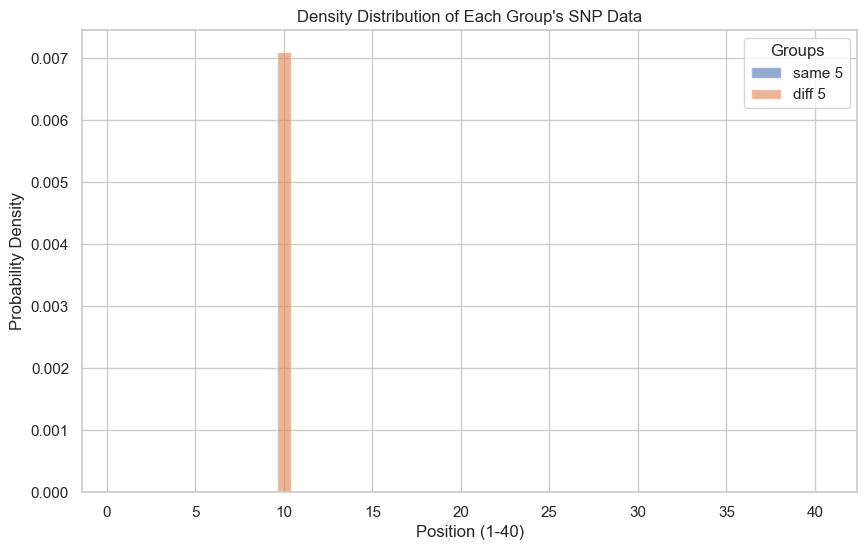

In [68]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 4
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

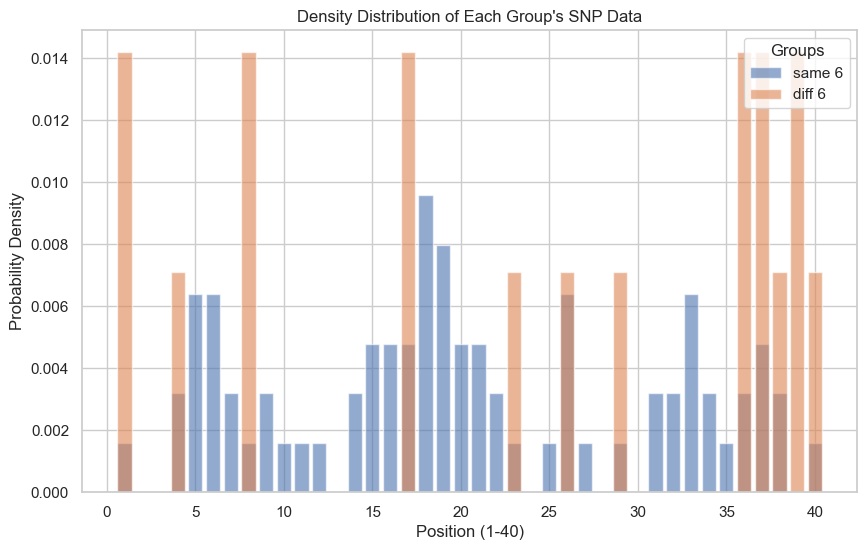

In [69]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 5
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

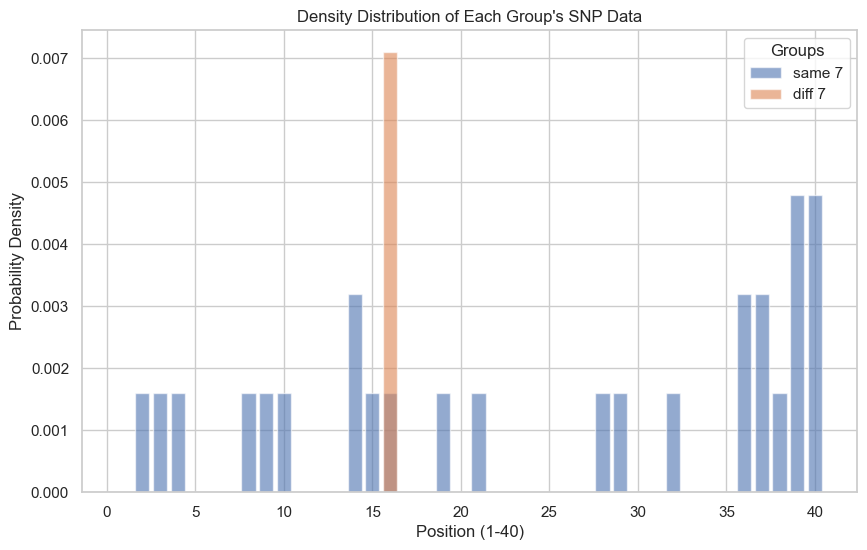

In [70]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 6
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

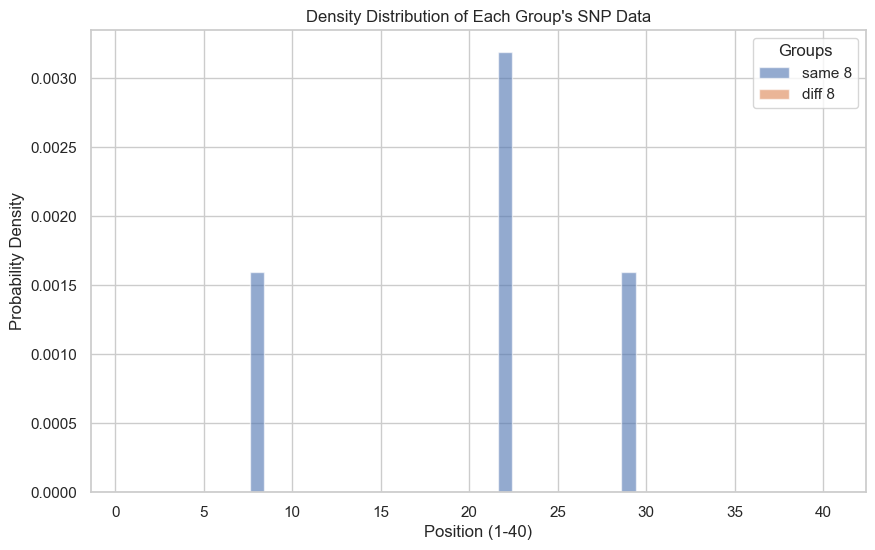

In [71]:
data_same = Same_df.iloc[:, 41:-1]
data_diff = diff_df.iloc[:, 41:-1]
# 计算总共有多少组，每组40列
num_samples, num_columns = data.shape
num_groups = num_columns // 40  # 每组40列


i = 7
group_data_same = data_same.iloc[:, i * 40:(i + 1) * 40]
mean_values_same = group_data_same.mean(axis=0)
group_data_diff = data_diff.iloc[:, i * 40:(i + 1) * 40]
mean_values_diff = group_data_diff.mean(axis=0)

# 设置图像风格
sns.set(style="whitegrid")

# 创建一个绘图区域
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i+1}", alpha=0.6)
plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i+1}", alpha=0.6)
# 设置图像标题、标签和显示图例
plt.title("Density Distribution of Each Group's SNP Data")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

In [4]:
# 合并所有样本
folder_path = '/BioII/lulab_b/huangkeyun/zhangys/alkb-seq/resources/NomalSamples/labels/'

# 获取该文件夹下所有 CSV 文件的文件名，并按文件名顺序排序
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

# 创建一个空的列表，用于存储所有的 DataFrame
dfs = []

# 依次读取每个 CSV 文件并将其添加到列表中
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # 读取 CSV 文件
    dfs.append(df)  # 将 DataFrame 添加到列表中

# 将所有的 DataFrame 按列合并
labels = pd.concat(dfs, axis=0)

# 设置文件夹路径
folder_path = '/BioII/lulab_b/huangkeyun/zhangys/alkb-seq/resources/NomalSamples/samples/'
# 获取该文件夹下所有 CSV 文件的文件名，并按文件名顺序排序
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
# 创建一个空的列表，用于存储所有的 DataFrame
dfs = []
# 依次读取每个 CSV 文件并将其添加到列表中
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)  # 读取 CSV 文件
    dfs.append(df)  # 将 DataFrame 添加到列表中
# 将所有的 DataFrame 按列合并
dataset = pd.concat(dfs, axis=0)
dataset = pd.concat([dataset, labels['label']], axis=1)
df_same = dataset[dataset['label'] == 0]
df_diff = dataset[dataset['label'] == 1]

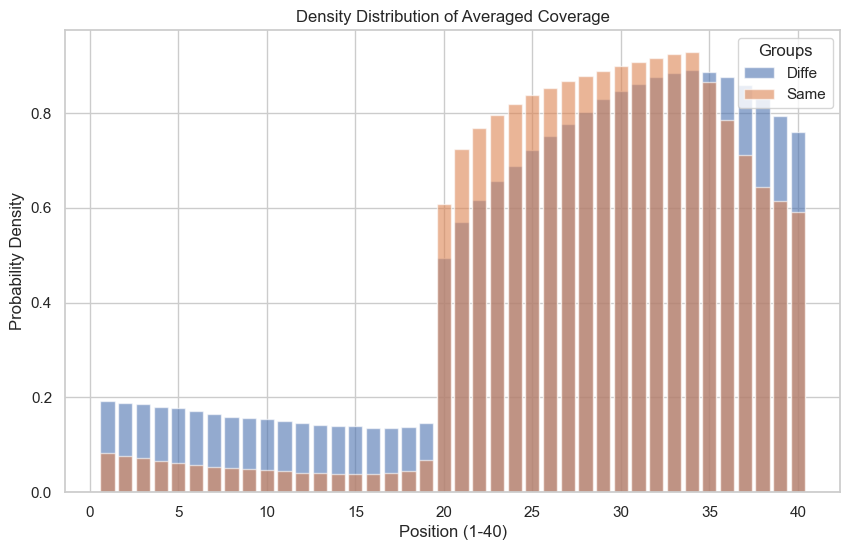

In [8]:
# 可视化所有样本中的coverage分布
cover_diff = df_diff.iloc[:, 1:41]
cover_same = df_same.iloc[:, 1:41]
# 计算总共有多少组，每组40列
num_samples, num_columns = cover_diff.shape
num_groups = num_columns // 40  # 每组40列

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


mean_values_diff = cover_diff.mean(axis=0)
mean_values_same = cover_same.mean(axis=0)
    
plt.bar(range(1, len(mean_values_diff) + 1), mean_values_diff, width=0.8, label=f"Diffe", alpha=0.6)
plt.bar(range(1, len(mean_values_diff) + 1), mean_values_same, width=0.8, label=f"Same", alpha=0.6)

plt.title("Density Distribution of Averaged Coverage")
plt.xlabel("Position (1-40)")
plt.ylabel("Probability Density")
plt.legend(title="Groups", loc="upper right")

# 显示图像
plt.show()

In [19]:
def mod_n_visualisation(mod_number, data_same, data_diff):
    # 计算总共有多少组，每组40列
    i = mod_number
    group_data_same = data_same.iloc[:, (i * 40) + 1:(i + 1) * 40 + 1]
    mean_values_same = group_data_same.mean(axis=0)
    group_data_diff = data_diff.iloc[:, (i * 40) + 1:(i + 1) * 40 + 1]
    mean_values_diff = group_data_diff.mean(axis=0)

    # 设置图像风格
    sns.set(style="whitegrid")

    # 创建一个绘图区域
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(mean_values_same) + 1), mean_values_same, width=0.8, label=f"same {i}", alpha=0.6)
    plt.bar(range(1, len(mean_values_same) + 1), mean_values_diff, width=0.8, label=f"diff {i}", alpha=0.6)
    # 设置图像标题、标签和显示图例
    plt.title(f"Density Distribution of mod{mod_number}")
    plt.xlabel("Position (1-40)")
    plt.ylabel("Probability Density")
    plt.legend(title="Groups", loc="upper right")
    print( f"diff组mod{i}总表达值为", mean_values_diff.sum(), f"same组mod{i}z总表达值为", mean_values_same.sum())

diff组mod1总表达值为 0.01164874551971326 same组mod1z总表达值为 0.007445589919816724


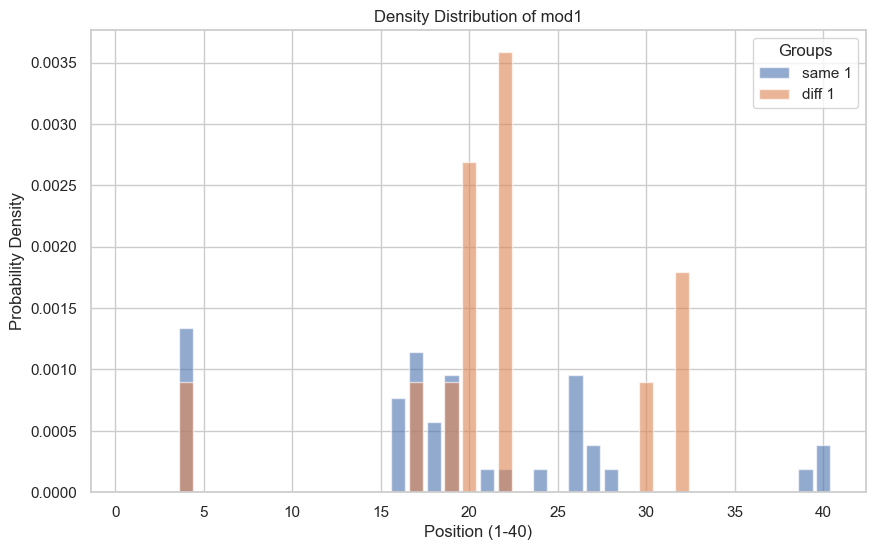

In [20]:
# 定义一个用于可视化单个mod的函数
df_same = dataset[dataset['label'] == 0]
df_diff = dataset[dataset['label'] == 1]
mod_n_visualisation(mod_number = 1, data_same=df_same, data_diff=df_diff)

diff组mod2总表达值为 0.22043010752688172 same组mod2z总表达值为 0.11951126384116076


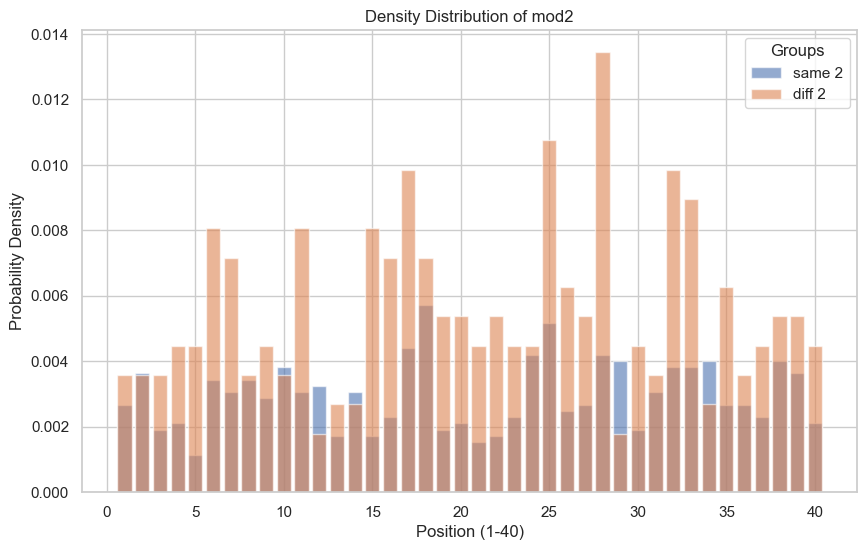

In [21]:
mod_n_visualisation(mod_number = 2, data_same=df_same, data_diff=df_diff)

diff组mod3总表达值为 0.022401433691756272 same组mod3z总表达值为 0.026727758686521573


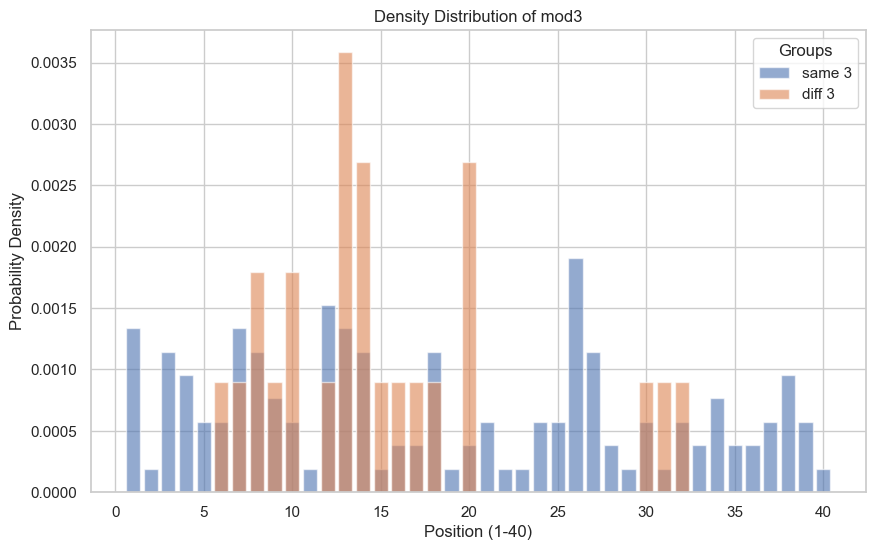

In [22]:
mod_n_visualisation(mod_number = 3, data_same=df_same, data_diff=df_diff)

diff组mod4总表达值为 0.4121863799283154 same组mod4z总表达值为 0.20294005345551738


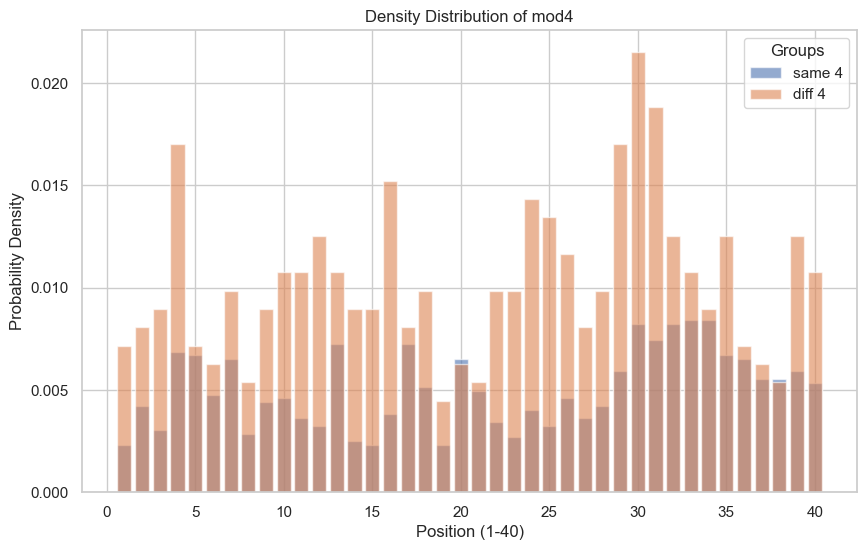

In [23]:
mod_n_visualisation(mod_number = 4, data_same=df_same, data_diff=df_diff)

diff组mod5总表达值为 0.002688172043010753 same组mod5z总表达值为 0.0009545628102329134


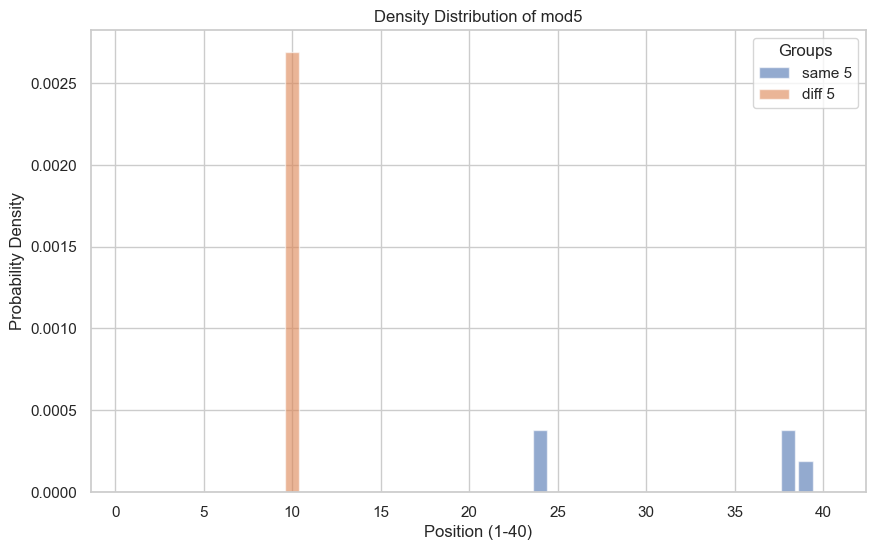

In [24]:
mod_n_visualisation(mod_number = 5, data_same=df_same, data_diff=df_diff)

diff组mod6总表达值为 0.12275985663082437 same组mod6z总表达值为 0.09163802978235969


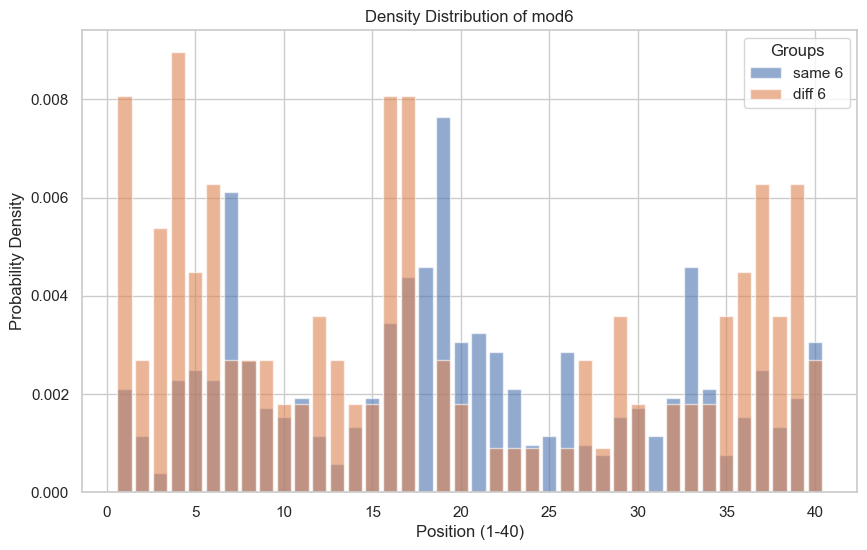

In [25]:
mod_n_visualisation(mod_number = 6, data_same=df_same, data_diff=df_diff)

diff组mod7总表达值为 0.012544802867383513 same组mod7z总表达值为 0.026727758686521573


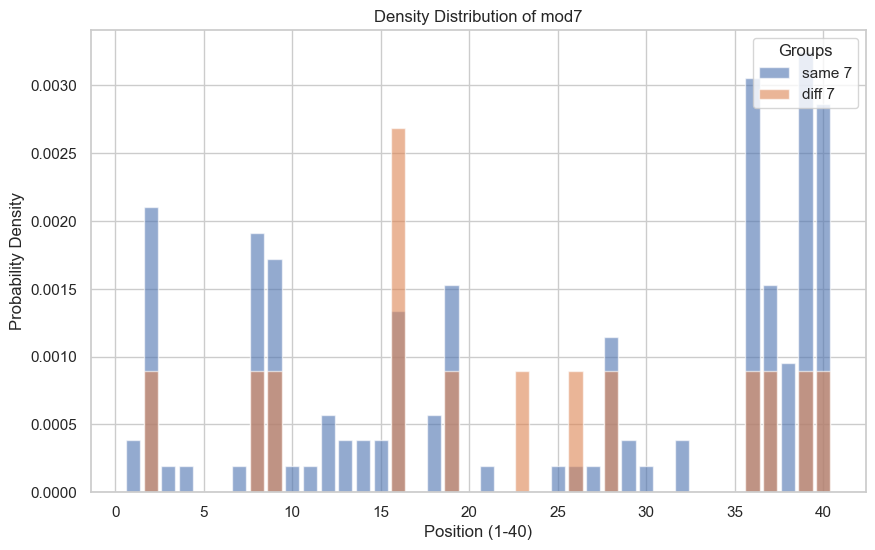

In [26]:
mod_n_visualisation(mod_number = 7, data_same=df_same, data_diff=df_diff)

diff组mod8总表达值为 0.0017921146953405018 same组mod8z总表达值为 0.004200076365024818


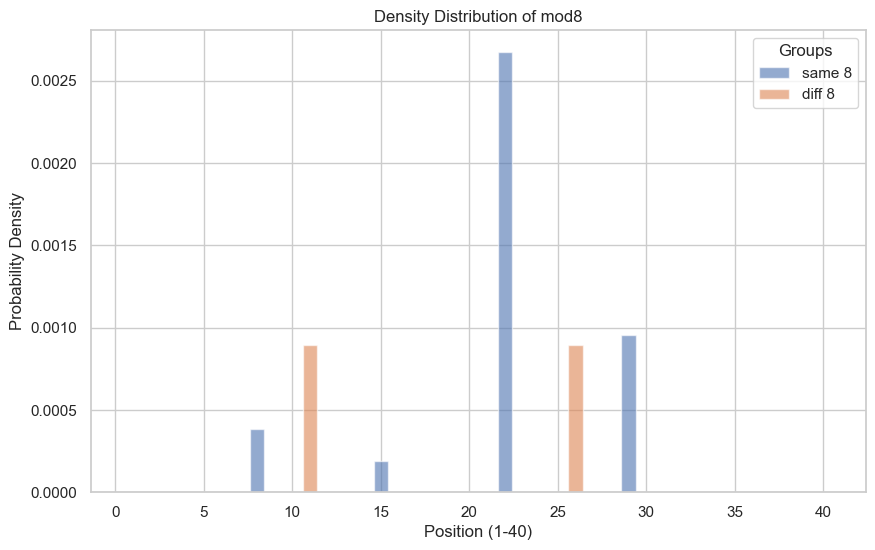

In [27]:
mod_n_visualisation(mod_number = 8, data_same=df_same, data_diff=df_diff)